# CEO-Request Challenge

## 1. Summary of Problem Statement

❓ **How could Olist improve its profit** ❓

### P&L Rules

#### Revenues  
**Sales fees:** Olist takes a **10% cut** on the product price (excl. freight) of each order delivered  
**Subscription fees:** Olist charges **80 BRL per month** per seller

#### Costs
_Estimated_ **reputation costs** of orders with bad reviews (<= 3 stars)  

💡 In the long term, bad customer experience has business implications: low repeat rate, immediate customer support cost, refunds or unfavorable word of mouth communication. We make an assumption about the monetary cost for each bad review:
```python
# review_score: cost(BRL)
{'1 star': 100
 '2 stars': 50
 '3 stars': 40
 '4 stars': 0
 '5 stars': 0}
```

**IT costs:** Olist's **total cumulated IT Costs** scale with the square root of the total number of sellers that have ever joined the platform, as well as with the square root of the total cumulated number of items that were ever sold.

$IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_items}$  
Olist's data team gave us the following values for these scaling parameters:
- $\alpha = 3157.27$
- $\beta = 978.23$

💡 Both the number of sellers to manage and the number of sales transaction are costly for IT systems.  
💡 Yet square roots reflect scale-effects: IT-system are often more efficient as they grow bigger.  
💡 Alpha > Beta means that Olist has a lower IT Cost with few sellers selling a lot of items rather than the opposite  
- with **1000 sellers** and a total of **100 items** sold, the total IT cost accumulates to 109,624 BRL
- with **100 sellers** and a total of **1000 items** sold, the total IT cost accumulates to 62,507 BRL

Finally, The IT department also told you that since the birth of the marketplace, cumulated IT costs have amounted to **500,000 BRL**.

In [1]:
#Subscription Fees=months_on_olist×80
#Sales Fees=0.10×price
#price is in sales column

### Key Findings, so far

- `wait_time` is the most significant factor behind low review scores.
- `wait_time` is made up of seller's `delay_to_carrier` + `carrier_delivery_time`.
- Because the carrier's delivery time is out of Olist's direct control, improving it is not a quick-win recommendation.
- On the contrary, a better selection of `sellers` can positively impact the `delay_to_carrier` and reduce the number of bad `review_scores` on Olist.
- Comments in the bad reviews showed that some were linked to the seller or to the product itself.

💡 We recommend you to start with the the guided seller analysis in part 2 below.

💪 But feel free to investigate other hypothesis instead with part 3.

## 2. Should Olist remove under-performing sellers from its marketplace? 🕵🏻
*(recommended)*

To analyze the impact of removing the worst sellers from Olist's marketplace, we will perform a **what-if analysis**

👉 **What would have happened if Olist had never accepted these sellers in the first place?**  

*(In practice, it's hard to know in advance who is a good seller, but let's start with this approach and iterate later).*

### 2.1 Data Preparation

Compute, for each `seller_id`, and cumulated since the beginning:
- the `revenues` the seller brings
- the `review_costs` associated with the seller's bad reviews
- the resulting `profits` (revenues - costs)

👉 Write down a step-by-step strategy to create the DataFrame you need.


⚠️ Don't start from scratch, update your existing package! 😉

Starting from the `Seller` class of your `olist` package:

Edit the `get_training_data` method so that the DataFrame it returns contains the fields:
- `revenues`: sum of subscription and sales fees revenues
- `cost_of_reviews`: sum of costs associated with bad reviews
- `profits`: `revenues` - `cost_of_reviews`

In [2]:
from olist.seller import Seller
seller = Seller()
training_data = seller.get_training_data()
print(training_data.head())

Constructed CSV Path: /home/vinodha/code/vinodhaminnotra/04-Decision-Science/01-Project-Setup/data-context-and-setup/data/csv
Constructed CSV Path: /home/vinodha/code/vinodhaminnotra/04-Decision-Science/01-Project-Setup/data-context-and-setup/data/csv
                          seller_id        seller_city seller_state  \
0  3442f8959a84dea7ee197c632cb2df15           campinas           SP   
1  d1b65fc7debc3361ea86b5f14c68d2e2         mogi guacu           SP   
2  ce3ad9de960102d0677a81f5d0bb7b2d     rio de janeiro           RJ   
3  c0f3eea2e14555b6faeea3dd58c1b1c3          sao paulo           SP   
4  51a04a8a6bdcb23deccc82b0b80742cf  braganca paulista           SP   

   delay_to_carrier  wait_time     date_first_sale      date_last_sale  \
0          0.000000  13.018588 2017-05-05 16:25:11 2017-08-30 12:50:19   
1          0.000000   9.065716 2017-03-29 02:10:34 2018-06-06 20:15:21   
2          0.000000   4.042292 2018-07-30 12:44:49 2018-07-30 12:44:49   
3          0.000000   5.6

In [36]:
training_set.head()

NameError: name 'training_set' is not defined

In [ ]:
from olist.data import Olist

olist_instance = Olist()
data = olist_instance.get_data()

print(list(data.keys()))

In [ ]:
training_data['subscription_revenue'] = training_data['months_on_olist'] * 80
training_data['sales_fee_revenue'] = training_data['sales'] * 0.10
training_data['revenues'] = training_data['subscription_revenue'] + training_data['sales_fee_revenue']
print(training_data[['seller_id', 'subscription_revenue', 'sales_fee_revenue', 'revenues']].head())

In [ ]:
training_data['cost_of_reviews'] = (
    training_data['share_of_one_stars'] * 100 +
    training_data['share_of_five_stars'] * 50 +  # Adjusted based on the scaling
    (1 - training_data['share_of_one_stars'] - training_data['share_of_five_stars']) * 40  # Max mean mapping.
)

print(training_data[['seller_id', 'cost_of_reviews']].head())

In [ ]:
training_data['cost_of_reviews'] = (
    training_data['share_of_one_stars'] * 100 +
    (1 - training_data['share_of_five_stars'] - training_data['share_of_one_stars']) * 50 +
    (1 - training_data['share_of_five_stars']) * 40
)
print(training_data[['seller_id', 'cost_of_reviews']].head())

In [ ]:
training_data['cost_of_reviews'] = (
    training_data['share_of_one_stars'] * 100 +
    (1 - training_data['share_of_five_stars'] - training_data['share_of_one_stars']) * 50 +
    (1 - training_data['share_of_five_stars'] - training_data['share_of_one_stars']) * 40
)
print(training_data[['seller_id', 'share_of_one_stars', 'share_of_five_stars', 'cost_of_reviews']].head())

In [ ]:
training_data['profits'] = training_data['revenues'] - training_data['cost_of_reviews']
print(training_data[['seller_id', 'revenues', 'cost_of_reviews', 'profits']].head())

In [ ]:
print(training_data.head())

In [ ]:
# Drop rows with any null values
training_data = training_data.dropna()


In [ ]:
training_data

In [ ]:
original_data = training_data.copy()

### 2.2 What-if Analysis

👉 Time to perform the actual analysis, here are our steps:  

1️⃣ Write a function that will calculate IT costs based on two parameters: number of sellers and number of items.

2️⃣ Load the sellers data and sort them by decreasing profits (before IT costs).

3️⃣ Calculate profits:
   - Calculate the cumulative profits for each row.
   - Calculate the cumulative IT costs for each row using the function you defined before.
   - Calculate the cumulative net profit for each row.

4️⃣ Plot your results, and analyze them.

5️⃣ Determine the optimum number of sellers to keep, based on profits before and after IT costs. (Hint: look up `np.argmax`). What would have been the impact on:
   - Net profit after IT costs?
   - Net profit before IT costs
   - IT costs?
   - Total revenues?
   - Number of sellers?
   - Number of items sold?

6️⃣ How important were the IT costs in your analysis?

In [ ]:
import numpy as np

# Define the IT costs function
def calculate_it_costs(n_sellers, n_items, alpha=3157.27, beta=978.23):
    return alpha * np.sqrt(n_sellers) + beta * np.sqrt(n_items)

sorted_data = training_data.sort_values(by='profits', ascending=False).reset_index(drop=True)

print(sorted_data[['seller_id', 'profits']].head())

In [ ]:
# Calculate cumulative profits
sorted_data['cumulative_profits'] = sorted_data['profits'].cumsum()

# Calculate cumulative number of sellers
sorted_data['cumulative_sellers'] = np.arange(1, len(sorted_data) + 1)

# Calculate cumulative items sold
sorted_data['cumulative_items'] = sorted_data['quantity'].cumsum()

# Calculate cumulative IT costs using the defined function
sorted_data['cumulative_it_costs'] = calculate_it_costs(
    n_sellers=sorted_data['cumulative_sellers'],
    n_items=sorted_data['cumulative_items']
)

# Calculate cumulative net profits (profits after IT costs)
sorted_data['cumulative_net_profits'] = (
    sorted_data['cumulative_profits'] - sorted_data['cumulative_it_costs']
)

# Display the updated DataFrame
sorted_data[['seller_id', 'cumulative_profits', 'cumulative_it_costs', 'cumulative_net_profits']].head()


In [ ]:
alpha, beta = 3157.27, 978.23

def compute_costs_of_it(n_sellers: int, n_products: int) -> float:
    """Calculates cumulative cost of IT given n_sellers and n_products
    """
    return alpha * np.sqrt(n_sellers) + beta * np.sqrt(n_products)

round(compute_costs_of_it(n_sellers, sellers.quantity.sum()))

In [ ]:
profits.quantity.sum()

In [ ]:
profits.quantity.cumsum()

In [5]:
print(training_data.columns)

Index(['seller_id', 'seller_city', 'seller_state', 'delay_to_carrier',
       'wait_time', 'date_first_sale', 'date_last_sale', 'months_on_olist',
       'n_orders', 'quantity', 'quantity_per_order', 'sales',
       'share_of_one_stars', 'share_of_five_stars', 'review_score'],
      dtype='object')


In [6]:
# Calculate subscription revenue (80 BRL per month per seller)
training_data['subscription_revenue'] = training_data['months_on_olist'] * 80

# Calculate sales fee revenue (10% of sales)
training_data['sales_fee_revenue'] = training_data['sales'] * 0.10


In [7]:
# Calculate total revenues (subscription + sales fees)
training_data['revenues'] = training_data['subscription_revenue'] + training_data['sales_fee_revenue']


In [8]:
# Check the updated columns
print(training_data.columns)

# Display the first few rows to verify
print(training_data[['seller_id', 'subscription_revenue', 'sales_fee_revenue', 'revenues']].head())


Index(['seller_id', 'seller_city', 'seller_state', 'delay_to_carrier',
       'wait_time', 'date_first_sale', 'date_last_sale', 'months_on_olist',
       'n_orders', 'quantity', 'quantity_per_order', 'sales',
       'share_of_one_stars', 'share_of_five_stars', 'review_score',
       'subscription_revenue', 'sales_fee_revenue', 'revenues'],
      dtype='object')
                          seller_id  subscription_revenue  sales_fee_revenue  \
0  3442f8959a84dea7ee197c632cb2df15                 320.0             21.870   
1  d1b65fc7debc3361ea86b5f14c68d2e2                1120.0           1170.307   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   0.0             15.800   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                   0.0              7.999   
4  51a04a8a6bdcb23deccc82b0b80742cf                   0.0             16.799   

   revenues  
0   341.870  
1  2290.307  
2    15.800  
3     7.999  
4    16.799  


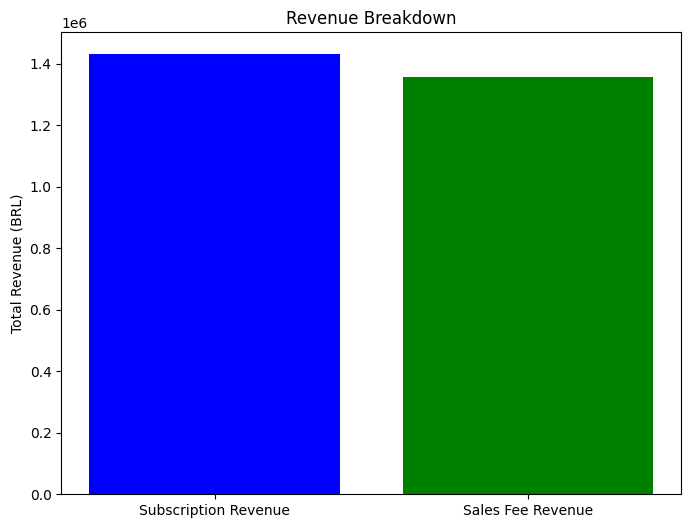

In [9]:
# Bar plot for subscription vs sales fee revenues
revenue_types = ['Subscription Revenue', 'Sales Fee Revenue']
revenue_sums = [training_data['subscription_revenue'].sum(), training_data['sales_fee_revenue'].sum()]

plt.figure(figsize=(8, 6))
plt.bar(revenue_types, revenue_sums, color=['blue', 'green'])
plt.title('Revenue Breakdown')
plt.ylabel('Total Revenue (BRL)')
plt.show()


In [10]:
# Calculate cost of reviews based on the share of one-star, two-star, and three-star reviews
training_data['cost_of_reviews'] = (
    training_data['share_of_one_stars'] * 100 +
    (1 - training_data['share_of_five_stars'] - training_data['share_of_one_stars']) * 50 +
    (1 - training_data['share_of_five_stars']) * 40
)

# Verify the updated dataset
print(training_data[['seller_id', 'cost_of_reviews']].head())


                          seller_id  cost_of_reviews
0  3442f8959a84dea7ee197c632cb2df15        76.666667
1  d1b65fc7debc3361ea86b5f14c68d2e2        27.250000
2  ce3ad9de960102d0677a81f5d0bb7b2d         0.000000
3  c0f3eea2e14555b6faeea3dd58c1b1c3         0.000000
4  51a04a8a6bdcb23deccc82b0b80742cf       140.000000


In [11]:
# Calculate profits
training_data['profits'] = training_data['revenues'] - training_data['cost_of_reviews']

# Verify the updated dataset
print(training_data[['seller_id', 'revenues', 'cost_of_reviews', 'profits']].head())


                          seller_id  revenues  cost_of_reviews      profits
0  3442f8959a84dea7ee197c632cb2df15   341.870        76.666667   265.203333
1  d1b65fc7debc3361ea86b5f14c68d2e2  2290.307        27.250000  2263.057000
2  ce3ad9de960102d0677a81f5d0bb7b2d    15.800         0.000000    15.800000
3  c0f3eea2e14555b6faeea3dd58c1b1c3     7.999         0.000000     7.999000
4  51a04a8a6bdcb23deccc82b0b80742cf    16.799       140.000000  -123.201000


In [12]:
# Sort sellers by decreasing profits
sorted_data = training_data.sort_values(by='profits', ascending=False).reset_index(drop=True)

# Verify the sorted dataset
print(sorted_data[['seller_id', 'profits']].head())


                          seller_id       profits
0  4869f7a5dfa277a7dca6462dcf3b52b2  24345.652680
1  53243585a1d6dc2643021fd1853d8905  23193.391517
2  4a3ca9315b744ce9f8e9374361493884  21593.527425
3  fa1c13f2614d7b5c4749cbc52fecda94  20970.777871
4  7c67e1448b00f6e969d365cea6b010ab  20164.028511


In [14]:
import numpy as np
# Calculate cumulative profits
sorted_data['cumulative_profits'] = sorted_data['profits'].cumsum()

# Calculate cumulative number of sellers and items sold
sorted_data['cumulative_sellers'] = np.arange(1, len(sorted_data) + 1)
sorted_data['cumulative_items'] = sorted_data['quantity'].cumsum()

# Define the IT costs function
def calculate_it_costs(n_sellers, n_items, alpha=3157.27, beta=978.23):
    return alpha * np.sqrt(n_sellers) + beta * np.sqrt(n_items)

# Calculate cumulative IT costs
sorted_data['cumulative_it_costs'] = calculate_it_costs(
    n_sellers=sorted_data['cumulative_sellers'],
    n_items=sorted_data['cumulative_items']
)

# Calculate cumulative net profits
sorted_data['cumulative_net_profits'] = (
    sorted_data['cumulative_profits'] - sorted_data['cumulative_it_costs']
)

# Verify the updated dataset
print(sorted_data[['seller_id', 'cumulative_profits', 'cumulative_it_costs', 'cumulative_net_profits']].head())


                          seller_id  cumulative_profits  cumulative_it_costs  \
0  4869f7a5dfa277a7dca6462dcf3b52b2        24345.652680         36417.090000   
1  53243585a1d6dc2643021fd1853d8905        47539.044197         43176.273861   
2  4a3ca9315b744ce9f8e9374361493884        69132.571621         63777.953213   
3  fa1c13f2614d7b5c4749cbc52fecda94        90103.349492         69249.026160   
4  7c67e1448b00f6e969d365cea6b010ab       110267.378003         79627.131782   

   cumulative_net_profits  
0           -12071.437320  
1             4362.770336  
2             5354.618408  
3            20854.323332  
4            30640.246221  


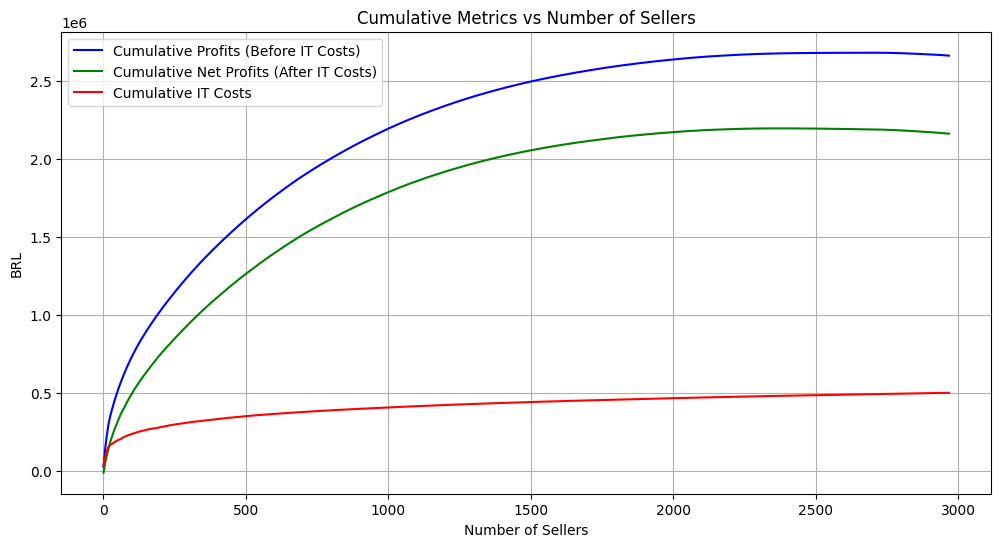

In [15]:
import matplotlib.pyplot as plt

# Plot cumulative metrics
plt.figure(figsize=(12, 6))
plt.plot(sorted_data['cumulative_sellers'], sorted_data['cumulative_profits'], label='Cumulative Profits (Before IT Costs)', color='blue')
plt.plot(sorted_data['cumulative_sellers'], sorted_data['cumulative_net_profits'], label='Cumulative Net Profits (After IT Costs)', color='green')
plt.plot(sorted_data['cumulative_sellers'], sorted_data['cumulative_it_costs'], label='Cumulative IT Costs', color='red')

# Add labels and legend
plt.title('Cumulative Metrics vs Number of Sellers')
plt.xlabel('Number of Sellers')
plt.ylabel('BRL')
plt.legend()
plt.grid()
plt.show()


In [16]:
# Find the row where cumulative_net_profits is maximized
optimal_index = np.argmax(sorted_data['cumulative_net_profits'])
optimal_seller = sorted_data.iloc[optimal_index]

# Display the results
print(f"Optimal Number of Sellers: {optimal_seller['cumulative_sellers']}")
print(f"Net Profit After IT Costs: {optimal_seller['cumulative_net_profits']}")
print(f"Net Profit Before IT Costs: {optimal_seller['cumulative_profits']}")
print(f"IT Costs: {optimal_seller['cumulative_it_costs']}")
print(f"Cumulative Items Sold: {optimal_seller['cumulative_items']}")


Optimal Number of Sellers: 2376
Net Profit After IT Costs: 2193897.916927647
Net Profit Before IT Costs: 2674398.004274285
IT Costs: 480500.08734663785
Cumulative Items Sold: 111469


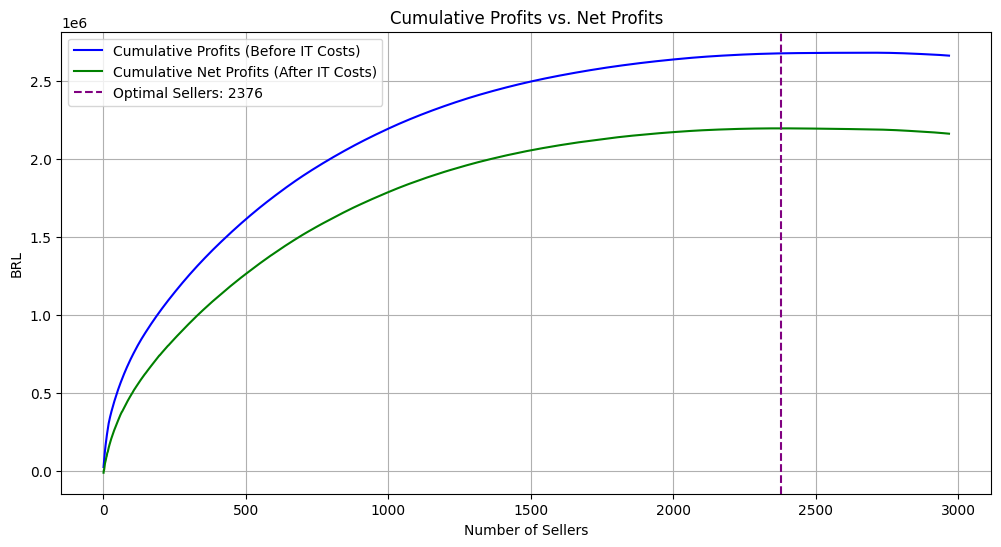

In [17]:
#Cumulative Profits vs. Net Profits:
plt.figure(figsize=(12, 6))
plt.plot(sorted_data['cumulative_sellers'], sorted_data['cumulative_profits'], label='Cumulative Profits (Before IT Costs)', color='blue')
plt.plot(sorted_data['cumulative_sellers'], sorted_data['cumulative_net_profits'], label='Cumulative Net Profits (After IT Costs)', color='green')
plt.axvline(optimal_seller['cumulative_sellers'], color='purple', linestyle='--', label=f'Optimal Sellers: {optimal_seller["cumulative_sellers"]}')

plt.title('Cumulative Profits vs. Net Profits')
plt.xlabel('Number of Sellers')
plt.ylabel('BRL')
plt.legend()
plt.grid()
plt.show()


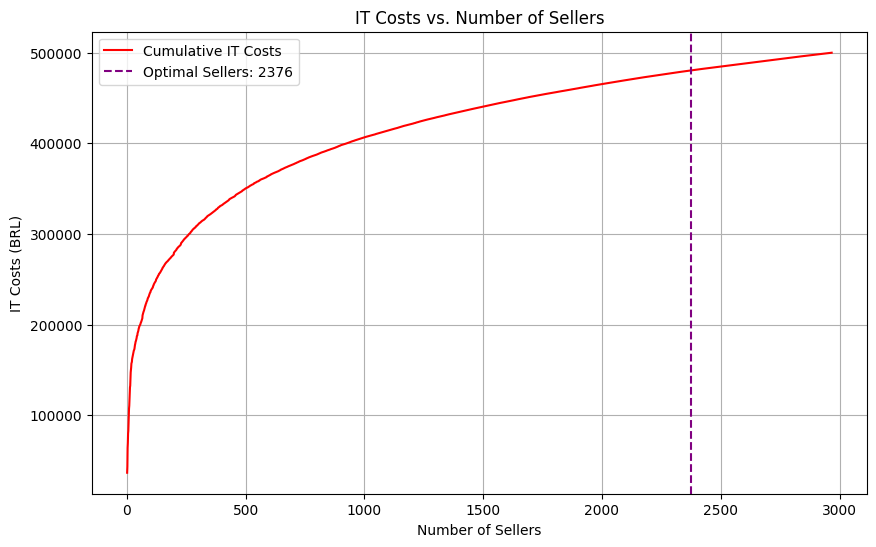

In [18]:
#IT Costs vs. Sellers: 
plt.figure(figsize=(10, 6))
plt.plot(sorted_data['cumulative_sellers'], sorted_data['cumulative_it_costs'], label='Cumulative IT Costs', color='red')
plt.axvline(optimal_seller['cumulative_sellers'], color='purple', linestyle='--', label=f'Optimal Sellers: {optimal_seller["cumulative_sellers"]}')

plt.title('IT Costs vs. Number of Sellers')
plt.xlabel('Number of Sellers')
plt.ylabel('IT Costs (BRL)')
plt.legend()
plt.grid()
plt.show()


##Recommendations for the CEO
Retain Only the Top 2376 Sellers:

This maximizes net profits after IT costs while maintaining high revenue and sales volume.
Focus on Seller Performance:

Continue monitoring seller profitability and consider replacing or removing underperforming sellers.
Optimize IT Costs:

Evaluate strategies to reduce IT costs, such as scaling efficiencies or consolidating operations.
Revenue Diversification:

Explore ways to increase subscription revenue (e.g., offering premium seller services).

Summary Table for the CEO
Create a concise table summarizing the results:

Metric	Value
Optimal Sellers	2376
Net Profit After IT Costs	2,193,897.92 BRL
Net Profit Before IT Costs	2,674,398.00 BRL
IT Costs	480,500.09 BRL
Cumulative Items Sold	111,469

In [22]:
# Sort sellers by decreasing profits
sorted_data = training_data.sort_values(by='profits', ascending=False).reset_index(drop=True)

# Verify the sorted dataset
print(sorted_data[['seller_id', 'profits']].head())


                          seller_id       profits
0  4869f7a5dfa277a7dca6462dcf3b52b2  24345.652680
1  53243585a1d6dc2643021fd1853d8905  23193.391517
2  4a3ca9315b744ce9f8e9374361493884  21593.527425
3  fa1c13f2614d7b5c4749cbc52fecda94  20970.777871
4  7c67e1448b00f6e969d365cea6b010ab  20164.028511


In [21]:
import pandas as pd
summary = {
    'Metric': [
        'Optimal Sellers', 
        'Net Profit After IT Costs', 
        'Net Profit Before IT Costs', 
        'IT Costs', 
        'Cumulative Items Sold'
    ],
    'Value': [
        optimal_seller['cumulative_sellers'], 
        optimal_seller['cumulative_net_profits'], 
        optimal_seller['cumulative_profits'], 
        optimal_seller['cumulative_it_costs'], 
        optimal_seller['cumulative_items']
    ]
}
summary_df['Value'] = summary_df['Value'].apply(lambda x: f"{x:,.2f}")
print(summary_df)


                       Metric         Value
0             Optimal Sellers      2,376.00
1   Net Profit After IT Costs  2,193,897.92
2  Net Profit Before IT Costs  2,674,398.00
3                    IT Costs    480,500.09
4       Cumulative Items Sold    111,469.00


## 3. Investigate other Approaches 🕵️
*(optional)*

- Should Olist remove the worst performing products / categories from its marketplace entirely?
- Should Olist remove only consistently underperforming sellers, after a honeymoon period of a few months?
- Should Olist enforce sellers to include certain information on their product listings?
- Should Olist ask customers for purchase confirmation at certain times of day?
- Should Olist restrict seller/customer pairs between certain states to avoid delays?
- Should Olist acquire new sellers, with some cost assumptions to be suggested?
- ...


In [23]:

# Define thresholds for underperformance
low_profit_threshold = 0  # Sellers with profits <= 0 are underperforming
low_review_score_threshold = 3  # Sellers with review scores < 3 are underperforming
high_delay_threshold = 10  # Sellers with delay_to_carrier > 10 days are underperforming

# Identify underperforming sellers
underperforming_sellers = training_data[
    (training_data['profits'] <= low_profit_threshold) |
    (training_data['review_score'] < low_review_score_threshold) |
    (training_data['delay_to_carrier'] > high_delay_threshold)
]

# Display the underperforming sellers
print(f"Number of underperforming sellers: {len(underperforming_sellers)}")
print(underperforming_sellers[['seller_id', 'profits', 'review_score', 'delay_to_carrier']])


Number of underperforming sellers: 378
                             seller_id  profits  review_score  \
4     51a04a8a6bdcb23deccc82b0b80742cf -123.201         1.000   
5     c240c4061717ac1806ae6ee72be3533b  -84.010         4.000   
15    1444c08e64d55fb3c25f0f09c07ffcf2  134.900         1.000   
24    8bd0e3abda539b9479c4b44a691be1ec  527.155         2.625   
37    ec2e006556300a79a5a91e4876ab3a56  365.020         1.250   
...                                ...      ...           ...   
2934  918f6fbcf3ab724d805867303e593a1b  -37.030         4.000   
2950  63704069d9bd3a75c1cf59babe56004a -134.070         1.000   
2951  4e2627090e6e5b9fabba883a37897683  -40.050         1.000   
2959  f00f5b35d0abcacbdd863672f4bb2c1a  -60.100         4.000   
2966  9e25199f6ef7e7c347120ff175652c3b  -88.750         4.000   

      delay_to_carrier  
4             3.353727  
5             0.000000  
15            0.000000  
24            3.192347  
37            5.167535  
...                ...  
2934 

In [24]:
# Group by state to find regions with high underperformance
underperforming_by_state = underperforming_sellers.groupby('seller_state').agg({
    'profits': 'sum',
    'seller_id': 'count',
    'review_score': 'mean',
    'delay_to_carrier': 'mean'
}).rename(columns={'seller_id': 'underperforming_seller_count'})

# Sort by number of underperforming sellers
underperforming_by_state = underperforming_by_state.sort_values(by='underperforming_seller_count', ascending=False)

# Display
print(underperforming_by_state)


                   profits  underperforming_seller_count  review_score  \
seller_state                                                             
SP            31339.053604                           231      2.814140   
PR               75.307527                            38      2.938580   
MG             3170.877725                            23      2.512468   
RJ             3470.714571                            23      3.165404   
RS              405.910000                            22      2.755682   
SC              496.793000                            22      2.772727   
GO             -554.389000                             7      3.028571   
CE             -189.263000                             3      1.666667   
DF             1329.763030                             3      1.959596   
BA               64.890000                             2      2.500000   
AM              104.366667                             1      2.333333   
MS              -26.680000            

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


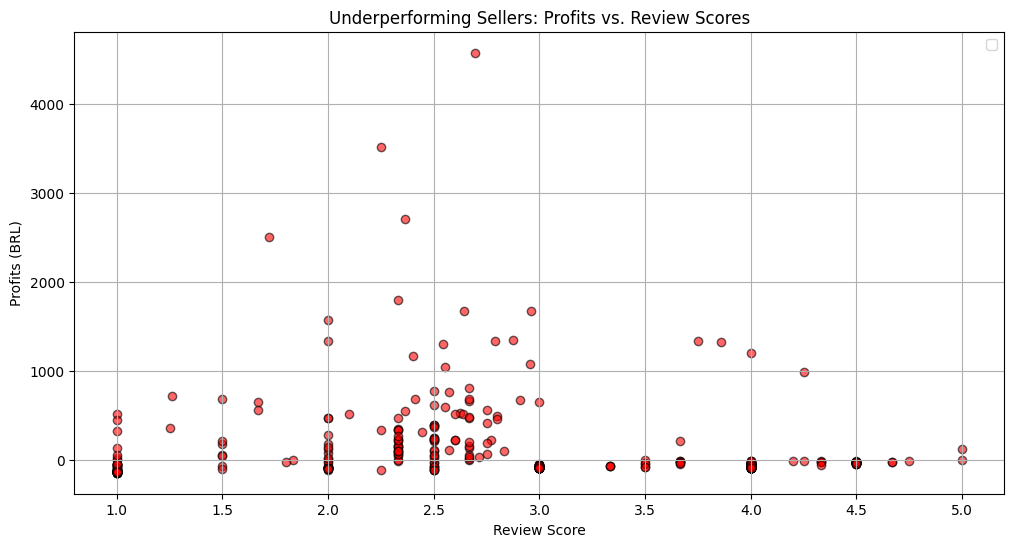

In [30]:
import matplotlib.pyplot as plt

# Scatter plot for profits vs. review scores
plt.figure(figsize=(12, 6))
plt.scatter(
    underperforming_sellers['review_score'], 
    underperforming_sellers['profits'], 
    color='red', alpha=0.6, edgecolor='black'
)

plt.title('Underperforming Sellers: Profits vs. Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Profits (BRL)')
plt.legend()
plt.grid()
plt.show()



In [31]:
# Define thresholds for low performance
low_profit_threshold = 0  # Sellers with profits <= 0 are low-performing
low_review_score_threshold = 3  # Sellers with review scores < 3 are low-performing

# Filter low-performing sellers based on the thresholds
low_performing_sellers = training_data[
    (training_data['profits'] <= low_profit_threshold) &  # Low profits
    (training_data['review_score'] < low_review_score_threshold)  # Low review scores
]

# Count the number of low-performing sellers
num_low_performing_sellers = len(low_performing_sellers)

# Print the result
print(f"Number of low-performing sellers (low profit & low review score): {num_low_performing_sellers}")

# Display details of low-performing sellers
low_performing_sellers_details = low_performing_sellers[
    ['seller_id', 'profits', 'review_score', 'delay_to_carrier', 'sales']
]
print(low_performing_sellers_details)


Number of low-performing sellers (low profit & low review score): 86
                             seller_id     profits  review_score  \
4     51a04a8a6bdcb23deccc82b0b80742cf -123.201000      1.000000   
57    b7ba853e9551f4558440881fd3e5c815 -102.320000      1.000000   
59    cbbd5ae8f53de5f5097cd8217b529e24  -79.820000      2.500000   
137   ebef8d8c92b4fd3226e5d407bbff21ac   -1.296667      2.666667   
153   c1dde11f12d05c478f5de2d7319ad3b2 -138.750000      1.000000   
...                                ...         ...           ...   
2752  984c273121e743dd14767befe6cb17f5 -114.040000      1.000000   
2805  df683dfda87bf71ac3fc63063fba369d -136.010000      1.000000   
2904  586a871d4f1221763fddb6ceefdeb95e -120.200000      1.000000   
2950  63704069d9bd3a75c1cf59babe56004a -134.070000      1.000000   
2951  4e2627090e6e5b9fabba883a37897683  -40.050000      1.000000   

      delay_to_carrier   sales  
4             3.353727  167.99  
57           14.000833  376.80  
59            0

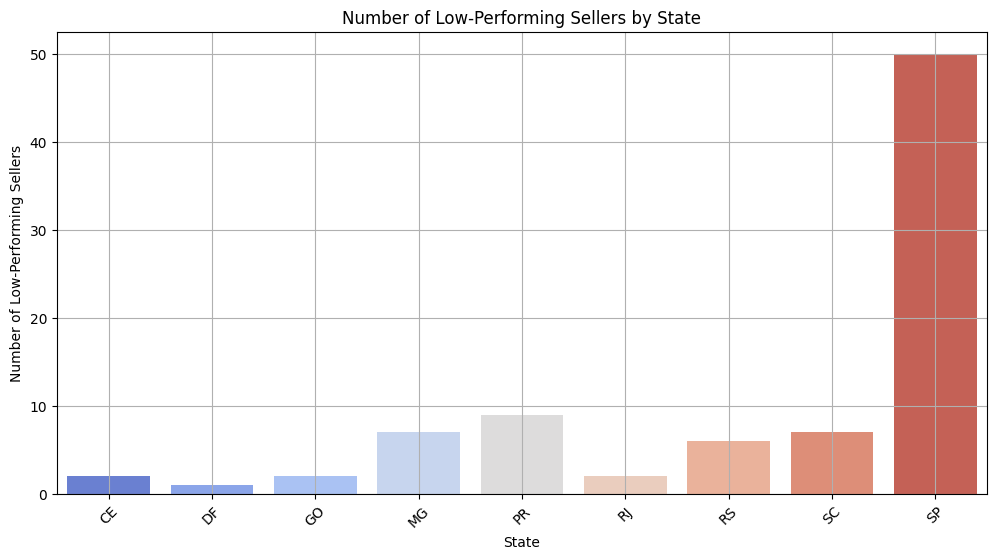

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by state to count low-performing sellers
low_performing_by_state = low_performing_sellers.groupby('seller_state')['seller_id'].count().reset_index()
low_performing_by_state.rename(columns={'seller_id': 'num_low_performing_sellers'}, inplace=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='seller_state', y='num_low_performing_sellers', data=low_performing_by_state, palette='coolwarm')
plt.title('Number of Low-Performing Sellers by State')
plt.xlabel('State')
plt.ylabel('Number of Low-Performing Sellers')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [35]:
# Define thresholds for low performance
low_profit_threshold = 0  # Sellers with profits <= 0
low_review_score_threshold = 3  # Sellers with review scores < 3

# Filter low-performing sellers
low_performing_sellers = training_data[
    (training_data['profits'] <= low_profit_threshold) & 
    (training_data['review_score'] < low_review_score_threshold)
]

# Calculate the number of low-performing sellers
num_low_performing_sellers = len(low_performing_sellers)

# Print the number
print(f"Number of low-performing sellers (low profit & low review score): {num_low_performing_sellers}")



Number of low-performing sellers (low profit & low review score): 86


In [37]:

#sellers_to_remove = seller_sort.iloc[optimal_sellers+1:]

NameError: name 'seller_sort' is not defined

In [38]:
!git add .
! git commit 

## Your turn!

🧺 Keep this notebook tidy! 

🗣 📊 You will present your insights to your favorite TA at the end of this `Communicate` unit 💪